In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def normalize(X,axis=0):
    mean=np.mean(X,axis=axis,keepdims=True)
    std=np.std(X,axis=axis,keepdims=True)
    X=(X-mean)/std
    return X

In [5]:
def append_bias_reshape(features,labels):
    m=features.shape[0]
    n=features.shape[1]
    x=np.reshape(np.c_[np.ones(m),features],[m,n+1])
    y=np.reshape(labels,[m,1])
    return x,y

In [6]:
#Data
boston=tf.contrib.learn.datasets.load_dataset("boston")
X_train,Y_train=boston.data, boston.target
X_train=normalize(X=X_train)
X_train,Y_train=append_bias_reshape(X_train,Y_train)
m=len(X_train)
n=13+1  # features + bias


Instructions for updating:
Please use tf.data.
Instructions for updating:
Use scikits.learn.datasets.
Instructions for updating:
Use tf.data instead.


In [7]:
# 数据占位符
X=tf.placeholder(tf.float32,name="X", shape=[m,n])
Y=tf.placeholder(tf.float32,name="Y", shape=[m,1])

In [8]:
#权重变量
w=tf.Variable(tf.random_normal([n,1]))

In [9]:
# 模型
Y_hat=tf.matmul(X,w)

In [10]:
#损失函数
loss=tf.reduce_mean(tf.square(Y-Y_hat),name="loss")

In [11]:
#选择优化器
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [14]:
init_op=tf.global_variables_initializer()
total=[]

with tf.Session() as sess:
    sess.run(init_op)
    writer=tf.summary.FileWriter("../data/multiple-linear-regression",sess.graph)
    for i in range(100):
        _,loss_tmp=sess.run([optimizer,loss],feed_dict={X:X_train,Y:Y_train})
        total.append(loss_tmp)
        print("Epoch {0}: Loss {1}".format(i,loss_tmp))
    writer.close()
    w_value=sess.run(w)

Epoch 0: Loss 651.6405639648438
Epoch 1: Loss 618.9212036132812
Epoch 2: Loss 589.2194213867188
Epoch 3: Loss 562.025390625
Epoch 4: Loss 536.9384765625
Epoch 5: Loss 513.6434326171875
Epoch 6: Loss 491.8901062011719
Epoch 7: Loss 471.4793701171875
Epoch 8: Loss 452.25140380859375
Epoch 9: Loss 434.07720947265625
Epoch 10: Loss 416.8511657714844
Epoch 11: Loss 400.4866943359375
Epoch 12: Loss 384.9115295410156
Epoch 13: Loss 370.0649719238281
Epoch 14: Loss 355.89520263671875
Epoch 15: Loss 342.3575744628906
Epoch 16: Loss 329.4132995605469
Epoch 17: Loss 317.02789306640625
Epoch 18: Loss 305.1709289550781
Epoch 19: Loss 293.8147277832031
Epoch 20: Loss 282.9342041015625
Epoch 21: Loss 272.50634765625
Epoch 22: Loss 262.5099792480469
Epoch 23: Loss 252.92526245117188
Epoch 24: Loss 243.73382568359375
Epoch 25: Loss 234.91827392578125
Epoch 26: Loss 226.46237182617188
Epoch 27: Loss 218.35060119628906
Epoch 28: Loss 210.5684356689453
Epoch 29: Loss 203.1018829345703
Epoch 30: Loss 195.9

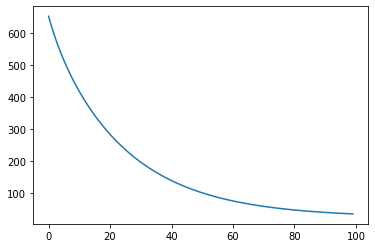

In [15]:
plt.plot(total)